<a href="https://colab.research.google.com/github/sriramofficial9/deep-learning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
ds = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [ ]:
ds.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
ds.drop('customerID',axis='columns',inplace=True)

In [ ]:
def unique_val(ds):
    for col in ds:
        print(ds[col].unique())

In [ ]:
ds.replace('No internet service','No',inplace=True)

In [ ]:
ds.replace('No phone service','No',inplace=True)

In [ ]:
unique_val(ds)

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


In [ ]:
ds.replace({'Female':1,'Male':0},inplace=True)

In [ ]:
ds.replace({'Yes':1,'No':0},inplace=True)

In [ ]:
unique_val(ds)

[1 0]
[0 1]
[1 0]
[0 1]
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
[0 1]
[0 1]
['DSL' 'Fiber optic' 0]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
['Month-to-month' 'One year' 'Two year']
[1 0]
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
[0 1]


In [ ]:
columns=['InternetService','Contract','PaymentMethod']
ds=pd.get_dummies(data=ds,columns=['InternetService','Contract','PaymentMethod'])

In [ ]:
ds

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.5,0,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.5,0,0,1,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.9,0,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,0,1,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.6,1,0,0,1,1,0,0,0,0,0,1


In [ ]:
ds=ds[ds.TotalCharges!=' ']

In [ ]:
ds


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.5,0,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.5,0,0,1,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.9,0,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,0,1,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.6,1,0,0,1,1,0,0,0,0,0,1


In [ ]:
x=ds.drop('Churn',1)

In [ ]:
y=ds['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
col_scale=['MonthlyCharges','TotalCharges','tenure']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[col_scale] = sc.fit_transform(X_train[col_scale])
X_test[col_scale] = sc.transform(X_test[col_scale])

In [ ]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3457,1,0,0,0,-1.273676,1,0,0,0,0,0,0,0,1,-1.508689,-0.995607,1,0,0,1,0,0,0,0,0,1
612,0,0,0,1,1.373390,1,0,0,0,0,0,0,0,0,-1.473855,-0.409302,1,0,0,0,0,1,0,0,0,1
589,0,0,1,1,1.577011,1,1,1,1,1,1,1,1,0,0.843392,1.918629,0,1,0,0,0,1,0,0,1,0
2685,1,0,1,0,1.617735,1,1,1,1,1,0,1,0,0,1.183432,2.210555,0,0,1,0,0,1,1,0,0,0
1549,0,0,0,0,-1.273676,1,0,0,0,0,0,0,0,1,-0.634537,-0.984057,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0,0,0,0,-0.540642,1,0,0,1,0,1,0,1,1,0.012368,-0.464202,0,1,0,0,1,0,1,0,0,0
5200,1,0,1,1,1.536287,1,1,0,1,1,0,1,1,1,1.377503,2.238147,0,0,1,0,1,0,0,0,1,0
3987,1,0,0,0,-0.866435,1,1,0,0,0,0,0,0,1,0.382265,-0.636859,0,0,1,1,0,0,0,0,1,0
235,0,0,0,0,-1.232952,1,1,0,1,0,0,0,0,1,-0.350894,-0.954142,0,1,0,1,0,0,0,0,0,1


In [ ]:

import tensorflow as tf
from tensorflow import keras

In [ ]:
model=keras.Sequential(
    [
     keras.layers.Dense(units=26,input_shape=(26,),activation='relu'),
     keras.layers.Dense(units=1,activation='sigmoid')
    ]
)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
176/176 [==============================] - 1s 1ms/step - loss: 0.4701 - accuracy: 0.7710
Epoch 2/5
176/176 [==============================] - 0s 1ms/step - loss: 0.4244 - accuracy: 0.8016
Epoch 3/5
176/176 [==============================] - 0s 1ms/step - loss: 0.4188 - accuracy: 0.8060
Epoch 4/5
176/176 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.8068
Epoch 5/5
176/176 [==============================] - 0s 1ms/step - loss: 0.4137 - accuracy: 0.8073


In [ ]:
model=keras.Sequential(
    [
     keras.layers.Dense(units=26,input_shape=(26,),activation='relu'),
     keras.layers.Dense(units=20,activation='relu'),
     keras.layers.Dense(units=1,activation='sigmoid')
    ]
)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
176/176 [==============================] - 1s 1ms/step - loss: 0.5072 - accuracy: 0.7362
Epoch 2/10
176/176 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.7968
Epoch 3/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.8009
Epoch 4/10
176/176 [==============================] - 0s 1ms/step - loss: 0.4183 - accuracy: 0.8048
Epoch 5/10
176/176 [==============================] - 0s 1ms/step - loss: 0.4144 - accuracy: 0.8044
Epoch 6/10
176/176 [==============================] - 0s 1ms/step - loss: 0.4137 - accuracy: 0.8080
Epoch 7/10
176/176 [==============================] - 0s 1ms/step - loss: 0.4120 - accuracy: 0.8075
Epoch 8/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8096
Epoch 9/10
176/176 [==============================] - 0s 1ms/step - loss: 0.4089 - accuracy: 0.8092
Epoch 10/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8084

In [ ]:
model=keras.Sequential(
    [
     keras.layers.Dense(units=26,input_shape=(26,),activation='relu'),
     keras.layers.Dense(units=22,activation='relu'),
     keras.layers.Dense(units=18,activation='relu'),
     keras.layers.Dense(units=12,activation='relu'),
     
     keras.layers.Dense(units=1,activation='sigmoid')
    ]
)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=120)

Epoch 1/120
176/176 [==============================] - 1s 1ms/step - loss: 0.4784 - accuracy: 0.7580
Epoch 2/120
176/176 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.7916
Epoch 3/120
176/176 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.8005
Epoch 4/120
176/176 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8055
Epoch 5/120
176/176 [==============================] - 0s 1ms/step - loss: 0.4121 - accuracy: 0.8062
Epoch 6/120
176/176 [==============================] - 0s 1ms/step - loss: 0.4082 - accuracy: 0.8105
Epoch 7/120
176/176 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 0.8135
Epoch 8/120
176/176 [==============================] - 0s 1ms/step - loss: 0.4022 - accuracy: 0.8130
Epoch 9/120
176/176 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8164
Epoch 10/120
176/176 [==============================] - 0s 1ms/step - loss: 0.3974 - accura

In [ ]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 994us/step - loss: 0.9109 - accuracy: 0.7470


[0.9109348058700562, 0.7469794154167175]

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([[1.0539362e-23],
       [9.7390807e-01],
       [1.3666153e-03],
       ...,
       [1.4555324e-06],
       [1.9909877e-01],
       [1.8161973e-05]], dtype=float32)

In [ ]:
y_pred.shape

(1407, 1)

In [ ]:
y_final = []
for element in y_pred:
    if element > 0.5:
        y_final.append(1)
    else:
        y_final.append(0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_final)
print(cm)
accuracy_score(y_test, y_final)

[[872 169]
 [187 179]]


0.7469793887704336

Text(87.0, 0.5, 'Truth')

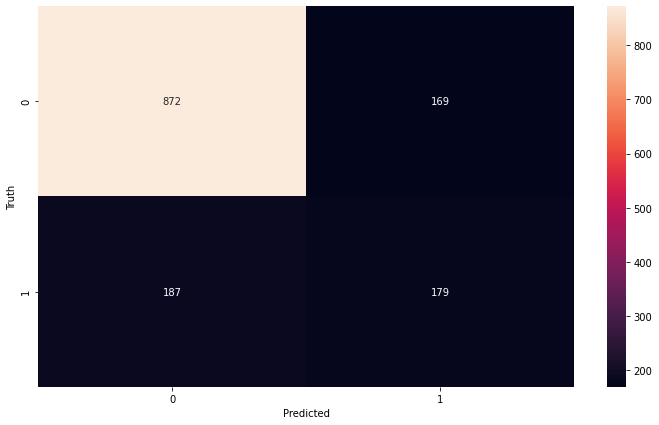

In [ ]:

import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_final)

plt.figure(figsize = (12,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

ACCURACY

In [ ]:
(872+179)/(187+179+872+169)

0.7469793887704336

**customer churn precision**

In [ ]:
179/(179+169)

0.514367816091954

**customer not churn precision**

In [ ]:
872/(187+872)

0.8234183191690274